# Importar librerias

In [178]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [179]:
df_country = pd.read_csv("../data/Country-data.csv")
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [180]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Manejo valores nulos

In [181]:
(
    df_country
    .isnull()
    .sum()
)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Validando duplicados

In [182]:
(
    df_country[df_country.duplicated()]
)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


# Análisis de distribución

In [183]:
int_columns  = (
    df_country
    .select_dtypes(
        exclude="object"
    ).columns
)

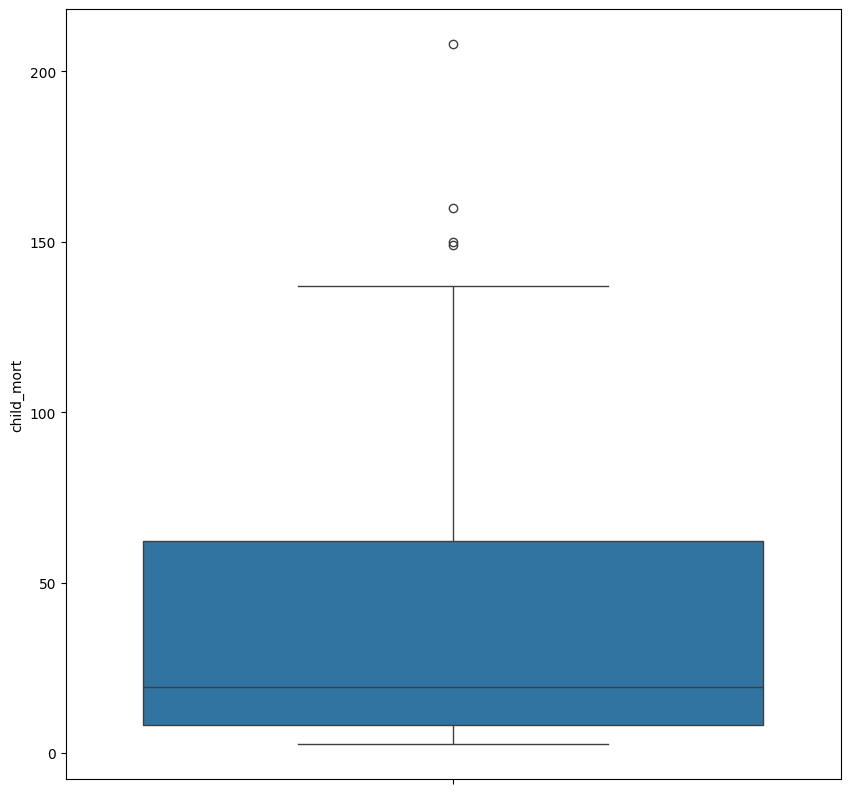

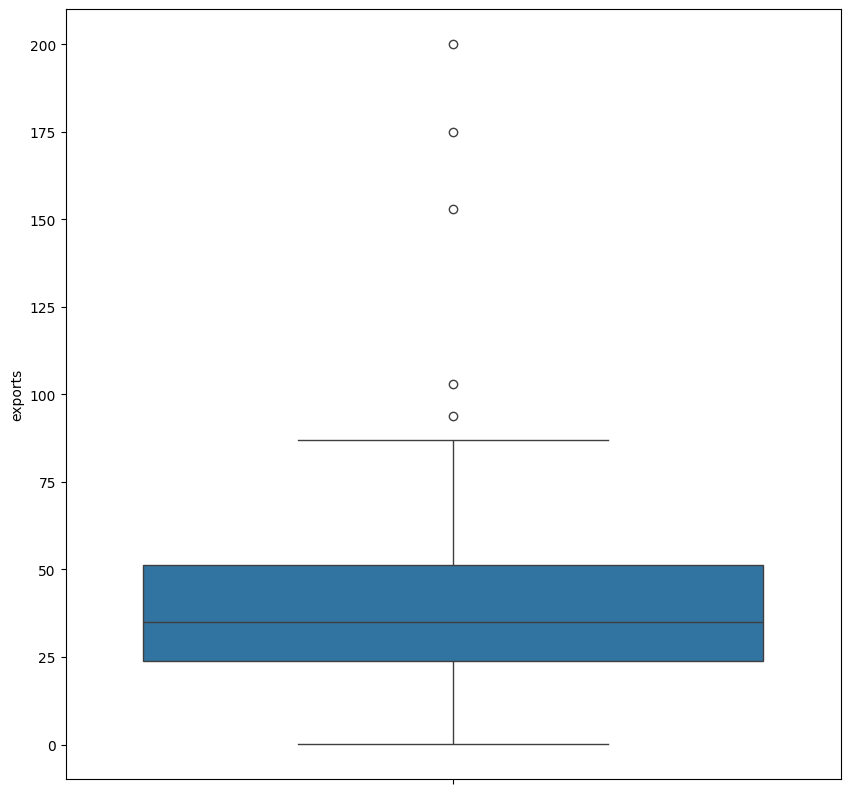

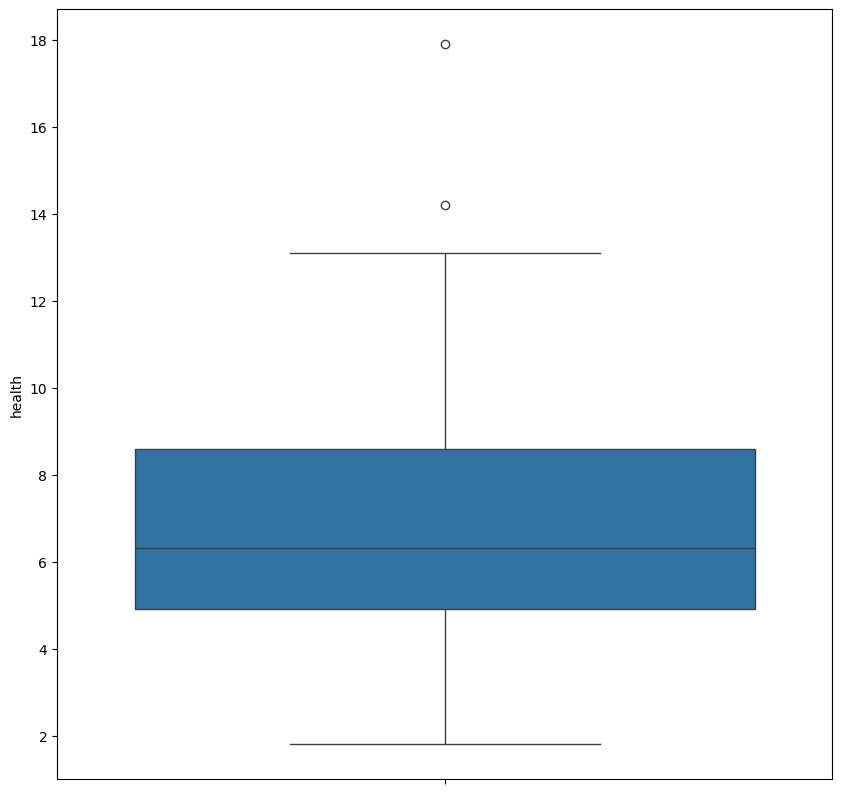

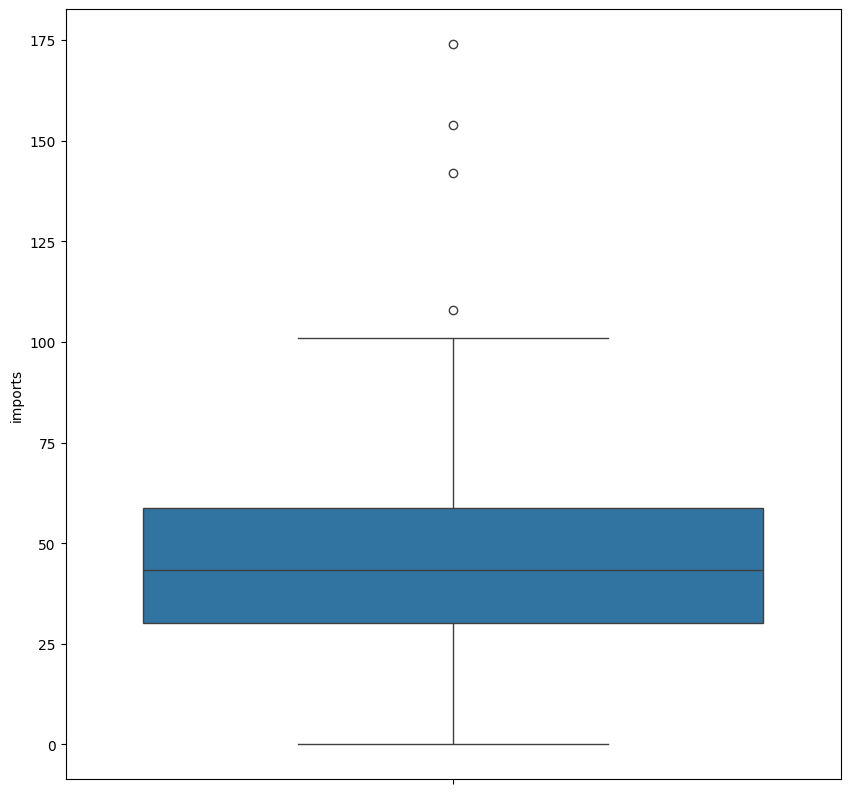

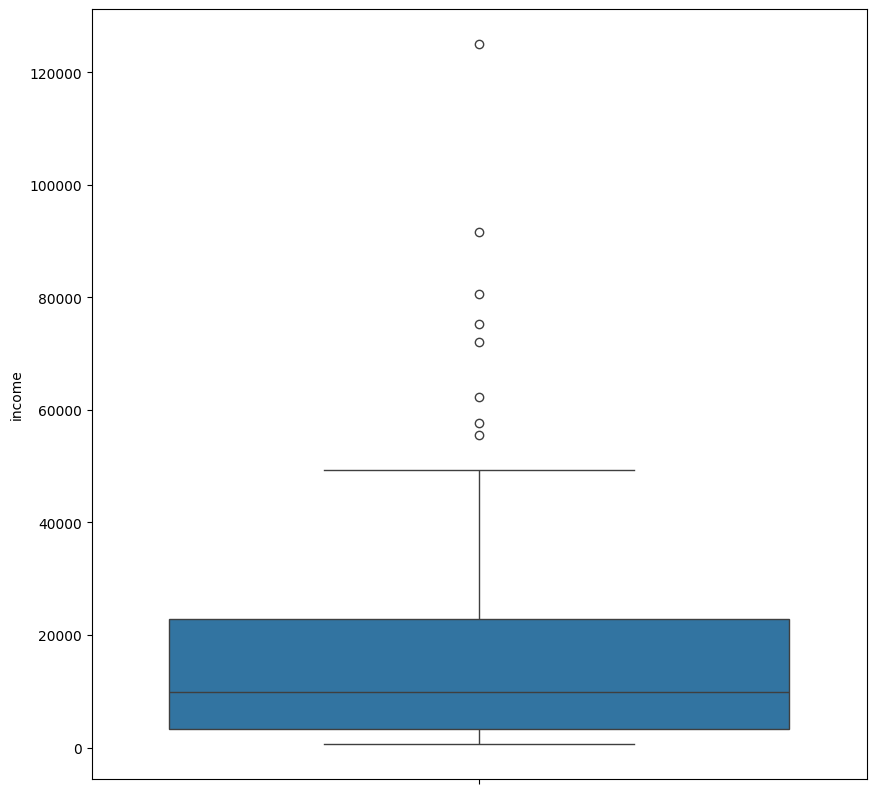

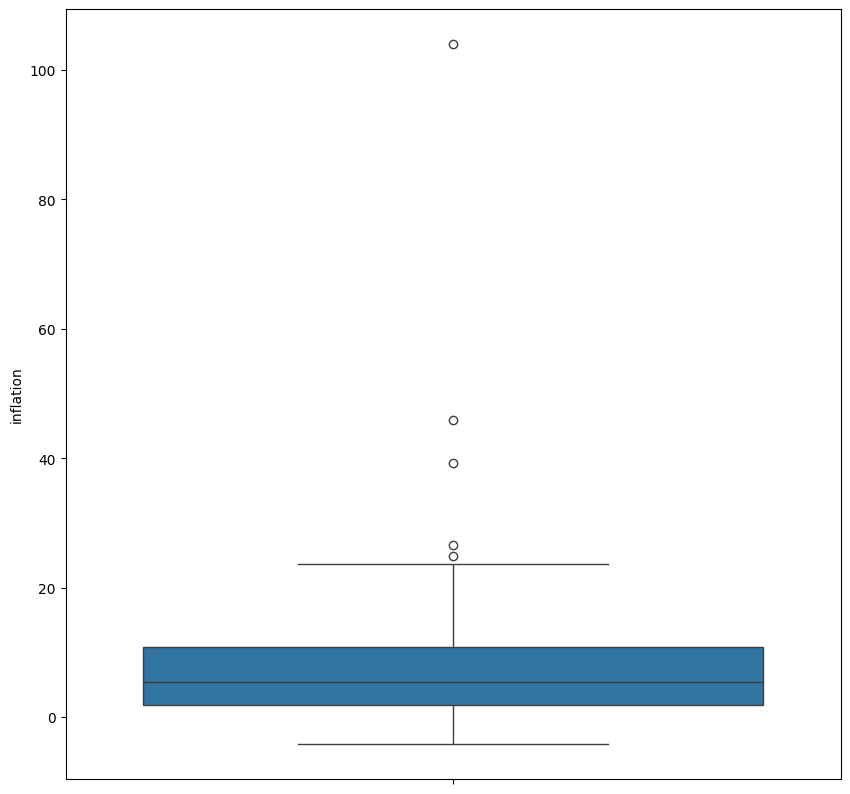

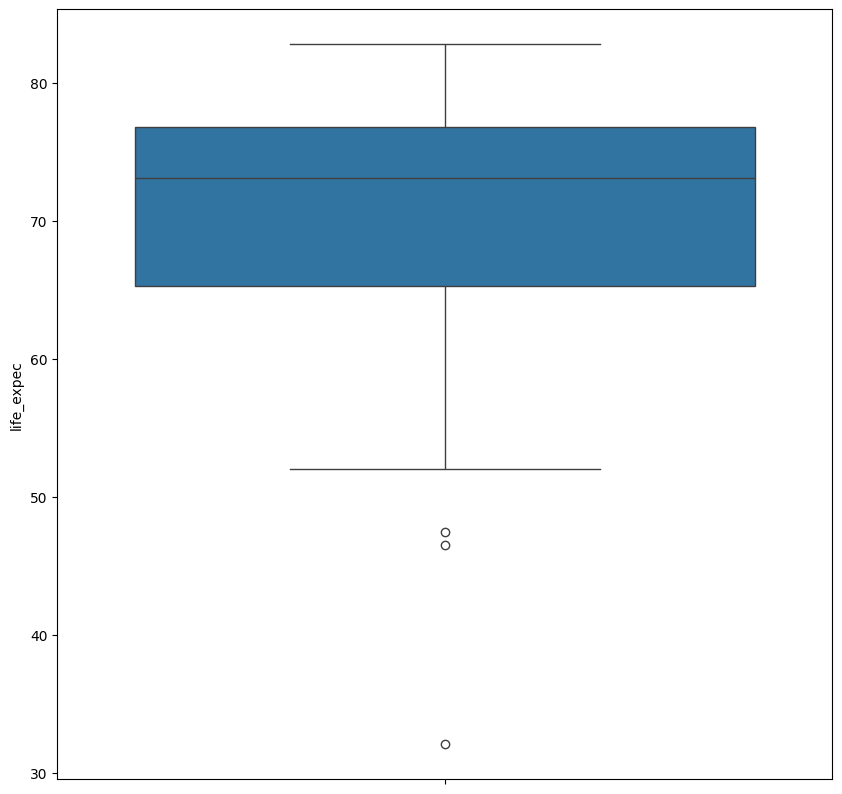

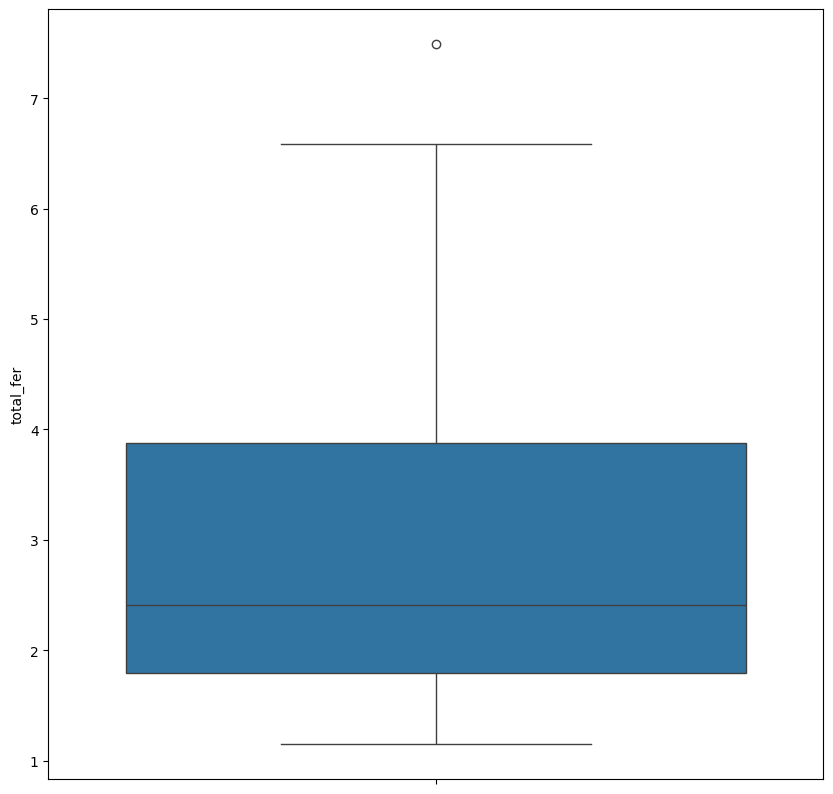

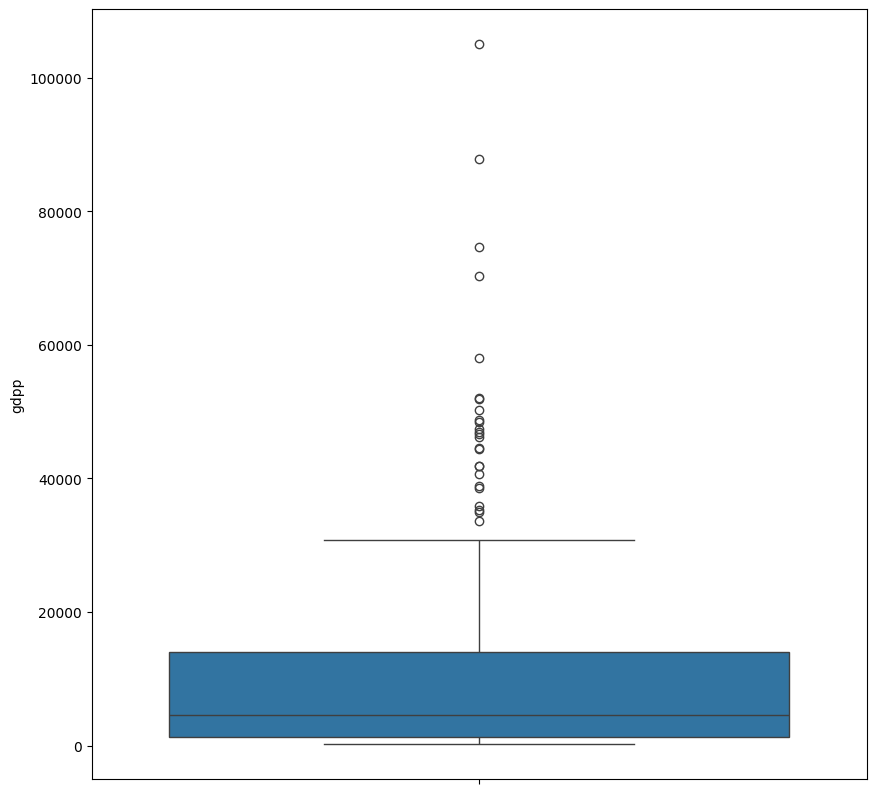

In [184]:
for _ in int_columns:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_country, y=_)
    plt.show()

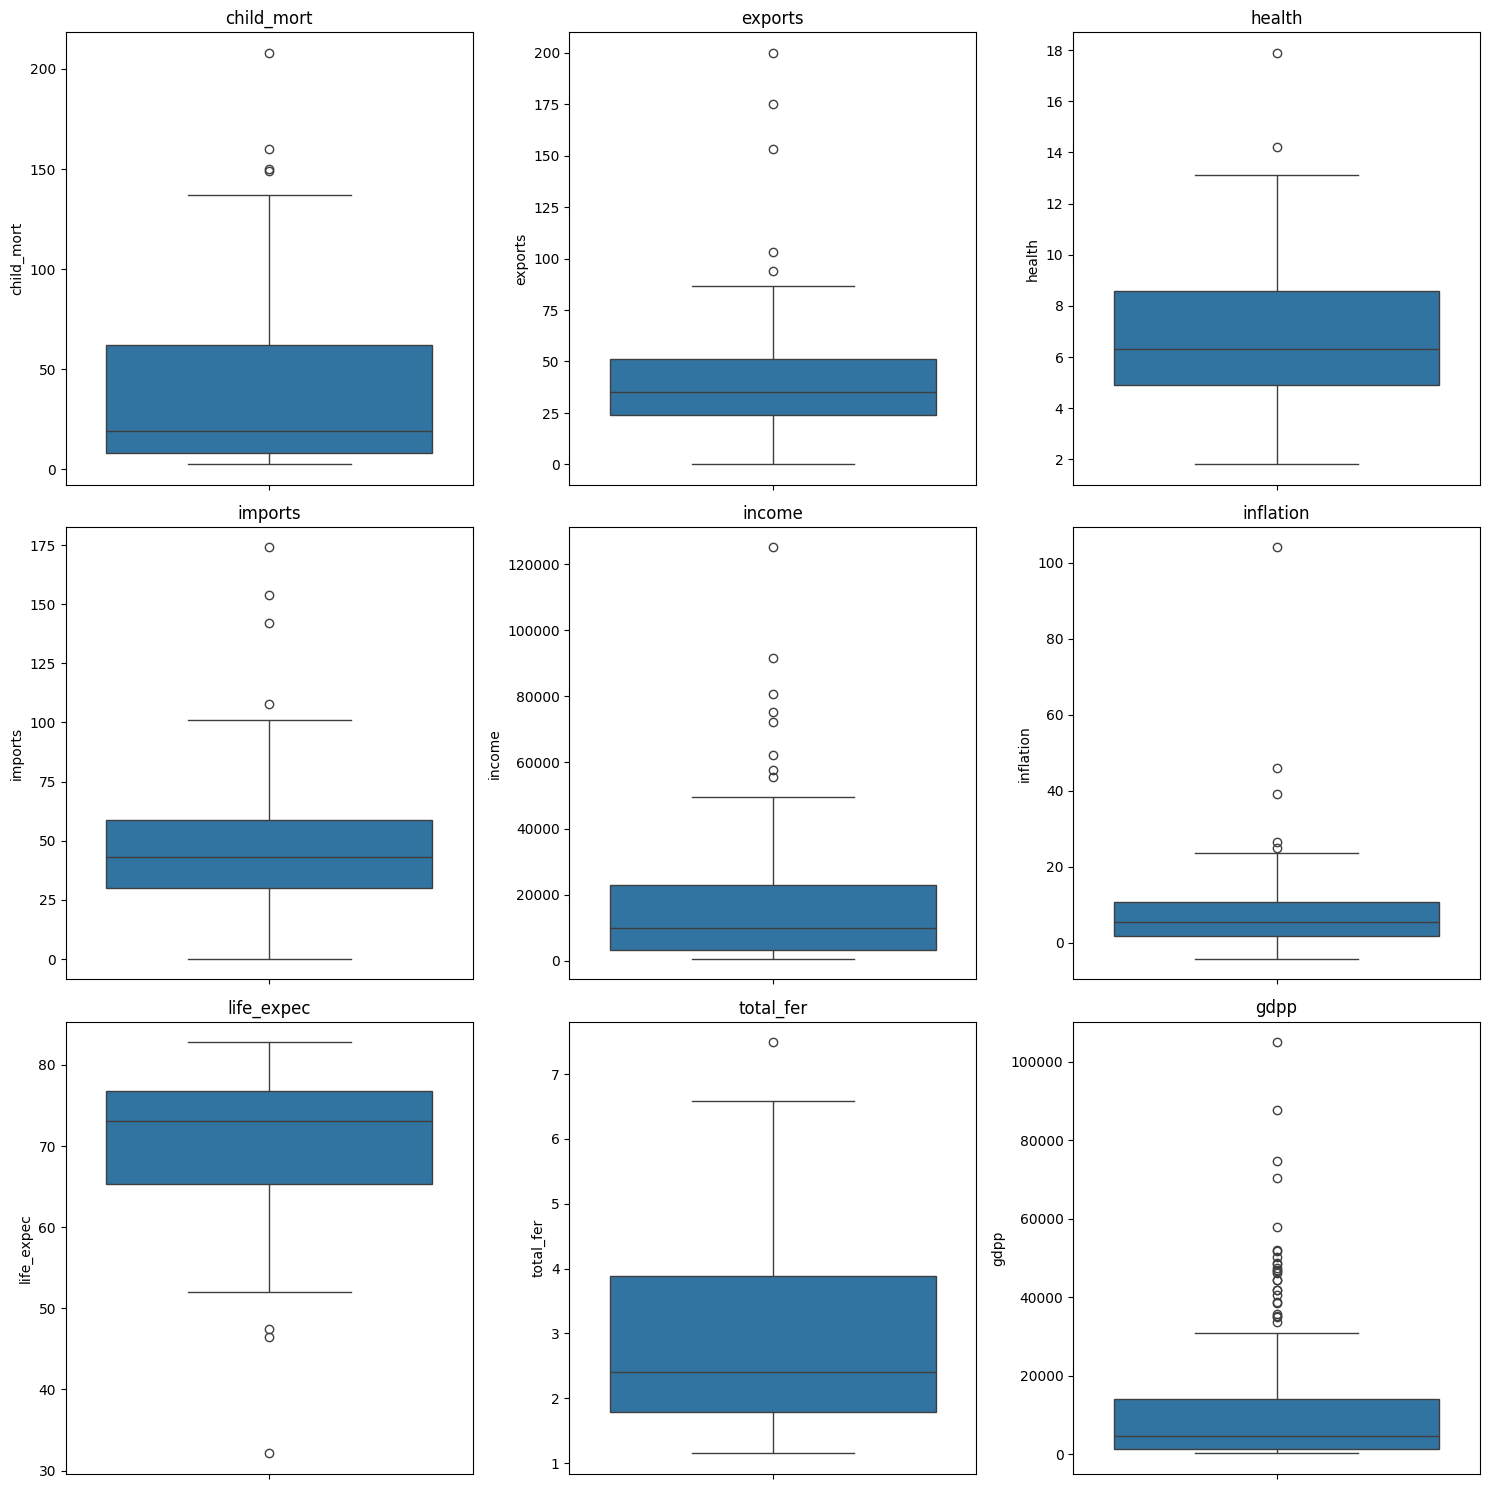

In [185]:
int_cols = df_country.select_dtypes(exclude='object').columns
num_plots = len(int_cols)
rows = 3  # Número de filas deseadas
cols = num_plots // rows + (num_plots % rows > 0)  # Número de columnas deseadas

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Ajusta el tamaño de la figura según tus necesidades

for i, col in enumerate(int_cols):
    ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]  # Obtén el eje correspondiente
    sns.boxplot(data=df_country, y=col, ax=ax)
    ax.set_title(col)  # Opcional: establece el título de cada gráfico

plt.tight_layout()  # Ajusta el espaciado entre los gráficos
plt.show()

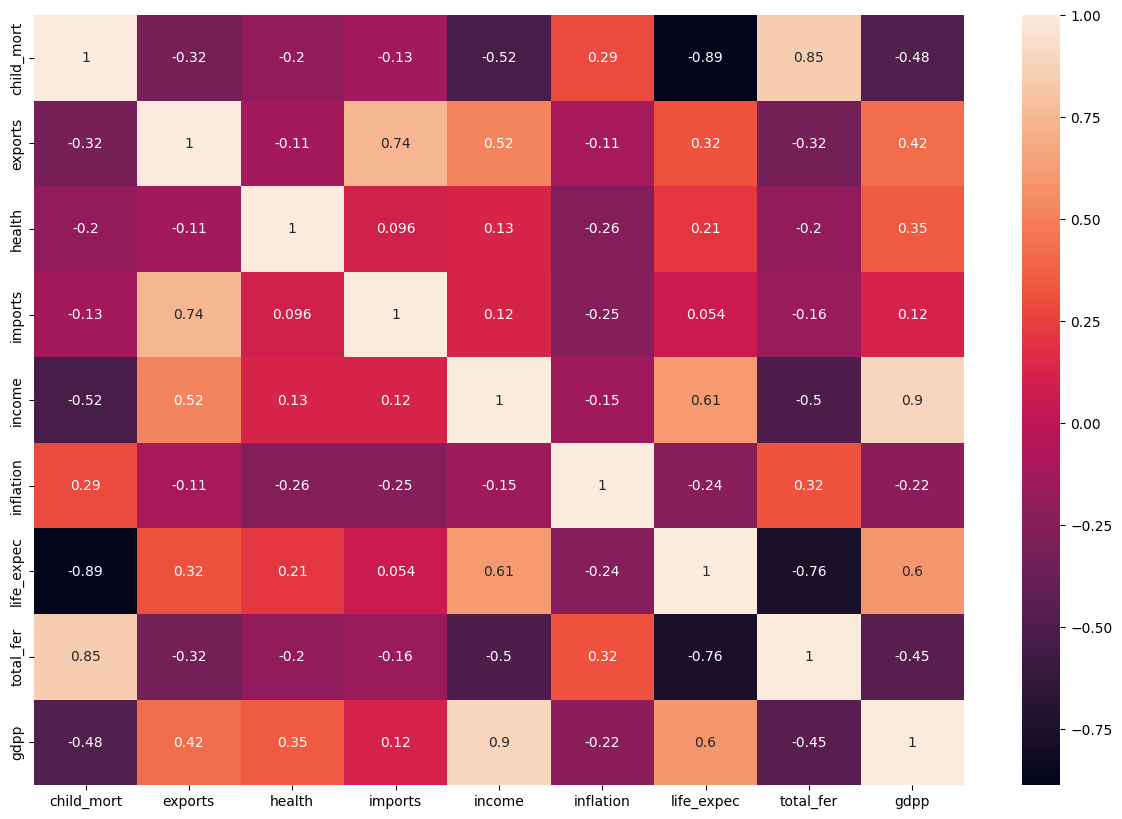

In [186]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_country.select_dtypes(include=['float64', 'int64']).corr(), annot=True)
plt.show()

# Escalar los datos

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
scales = StandardScaler()
df_country_scale  = scales.fit_transform(df_country.drop("country", axis=1))

# PCA

In [189]:
df_country_scale = pd.DataFrame(df_country_scale, columns=df_country.drop("country", axis=1).columns)

In [190]:
from sklearn.decomposition import PCA

In [191]:
pca = PCA()

pca.fit(df_country_scale)
pca_data_scales = pca.transform(df_country_scale)
pca_data_scales

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [192]:
var = pca.explained_variance_ratio_
print(var) # COn 1 undice tengo 4.1 con dos 1.5 y asi .....

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


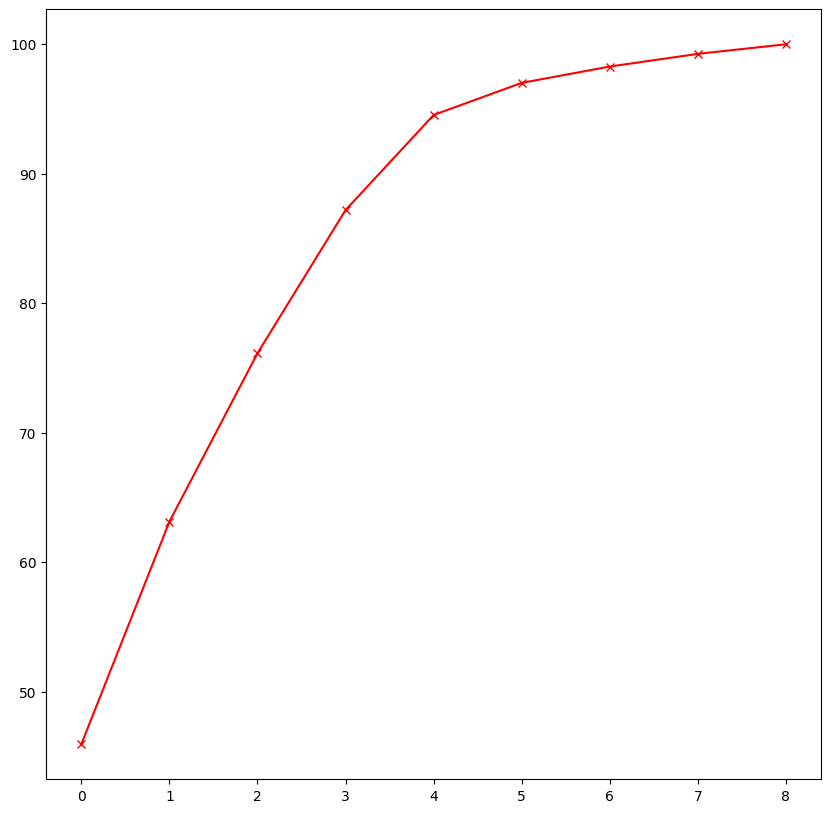

In [193]:
sum_var = np.cumsum(np.round(var, decimals=4))*100


plt.figure(figsize=(10,10))
plt.plot(sum_var, "r-x")
plt.show()

In [194]:
pca_data_standard = pd.DataFrame(pca_data_scales)
pca_data_standard.drop([4,5,6,7,8], axis=1, inplace=True)

In [195]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


# Importar lbrerias para clustering

In [196]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [197]:
sum_of_squared_distance = []

Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

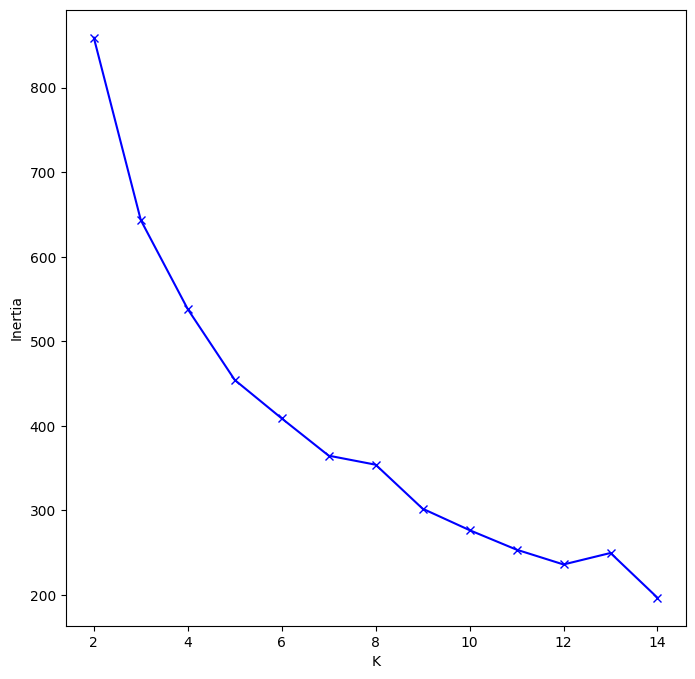

In [198]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

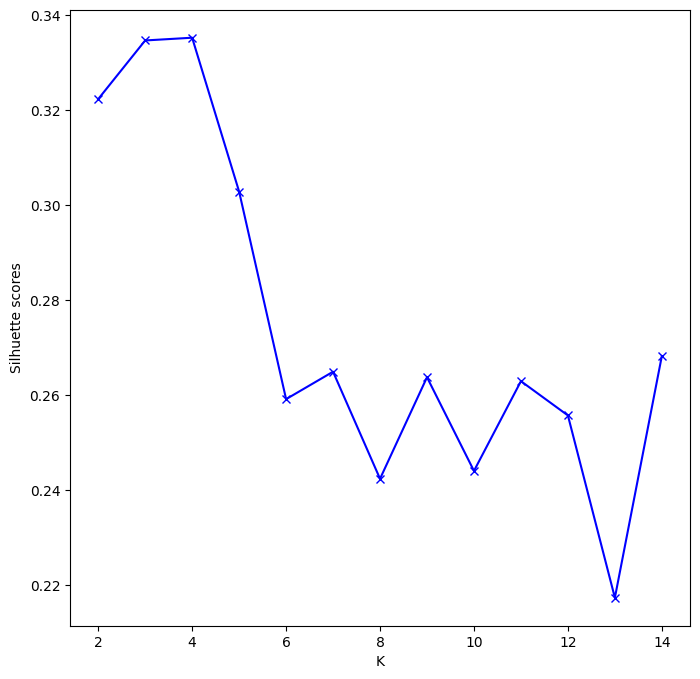

In [199]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhuette scores')
plt.show()

In [200]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y))
df_country["k_means_pca"] = y

0.2647245514945267


# Sin PCA

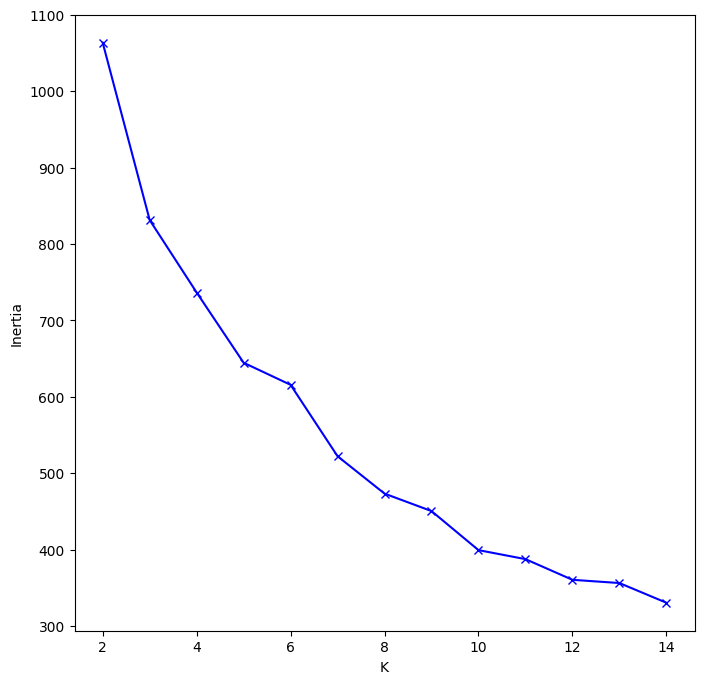

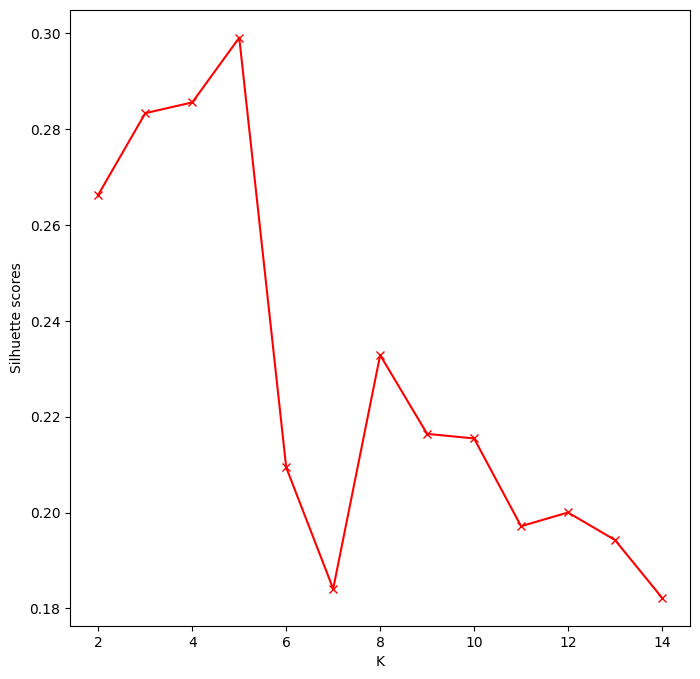

In [201]:
sum_of_squared_distance = []

Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15) 
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_country_scale)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scale,y))


fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()


fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhuette scores')
plt.show()

In [202]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(df_country_scale)
print(silhouette_score(df_country_scale,y))
df_country["k_means_pca"] = y

0.18839303661397952


# Agglomerativen hierarchical clustering

## PCA

Text(0, 0.5, 'Eucladian distance')

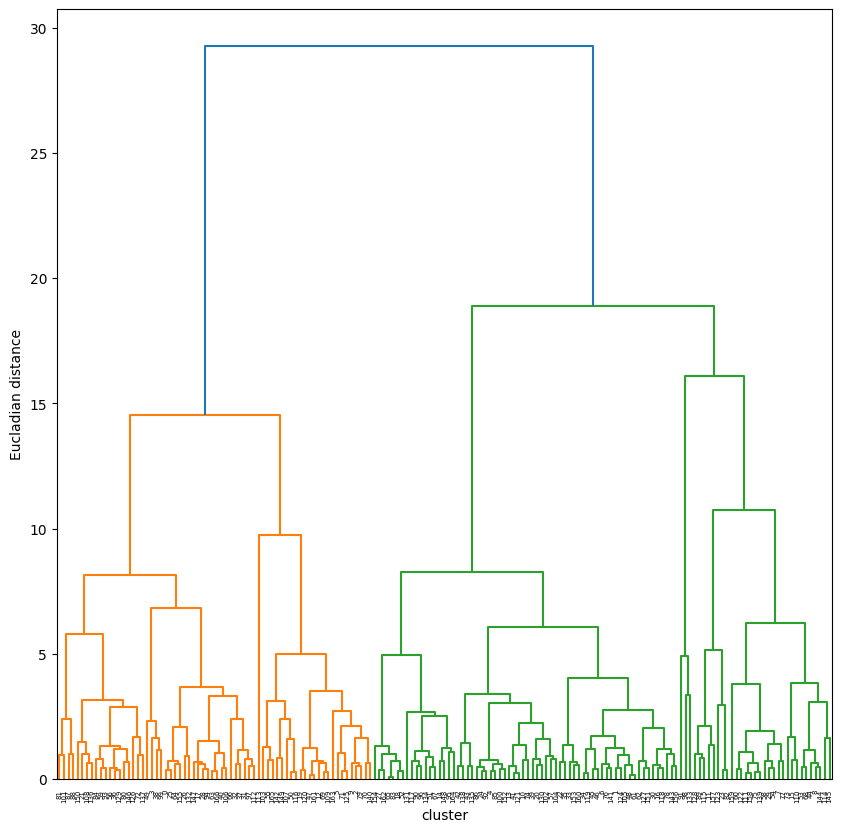

In [203]:
fig = plt.figure(figsize=(10,10))
dendogram_plot = dendrogram(linkage(pca_data_standard, method="ward"))
plt.xlabel("cluster")
plt.ylabel("Eucladian distance")

In [204]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc))
df_country["hc_pca"] = y_hc

0.3070110704080526


## Sin PCA

Text(0, 0.5, 'Eucladian distance')

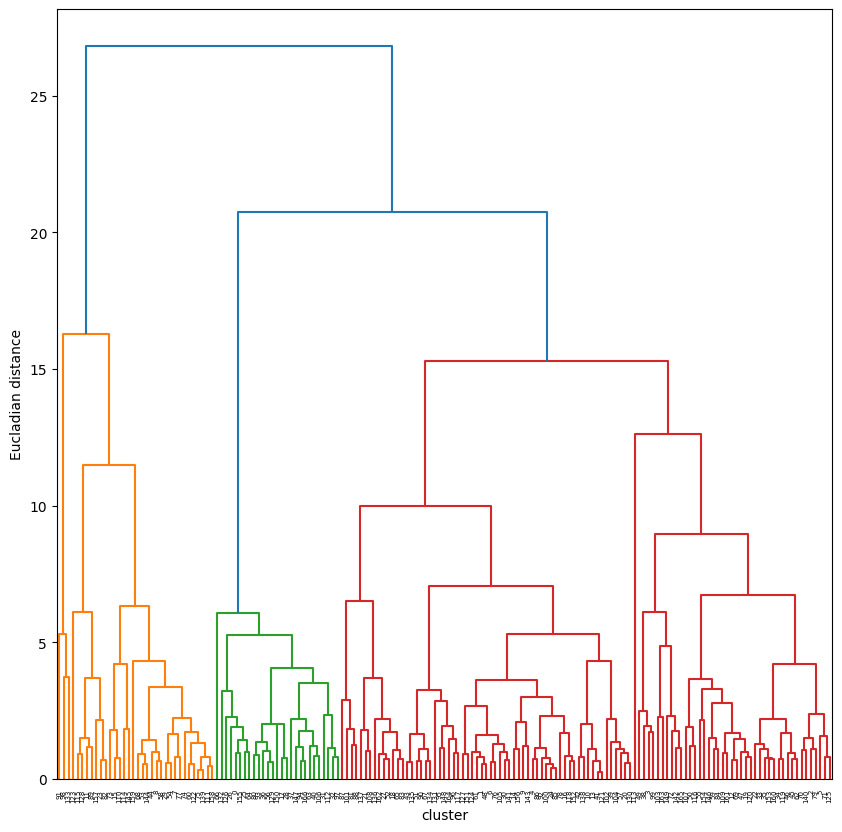

In [205]:
fig = plt.figure(figsize=(10,10))
dendogram_plot = dendrogram(linkage(df_country_scale, method="ward"))
plt.xlabel("cluster")
plt.ylabel("Eucladian distance")

In [206]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_hc = hc.fit_predict(df_country_scale)
print(silhouette_score(df_country_scale,y_hc))
df_country["hc_pca"] = y_hc

0.3153134331018189


# DBSCAN

## PCA

In [207]:
from sklearn.neighbors import NearestNeighbors

In [208]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard) # sacar distancias y el indice

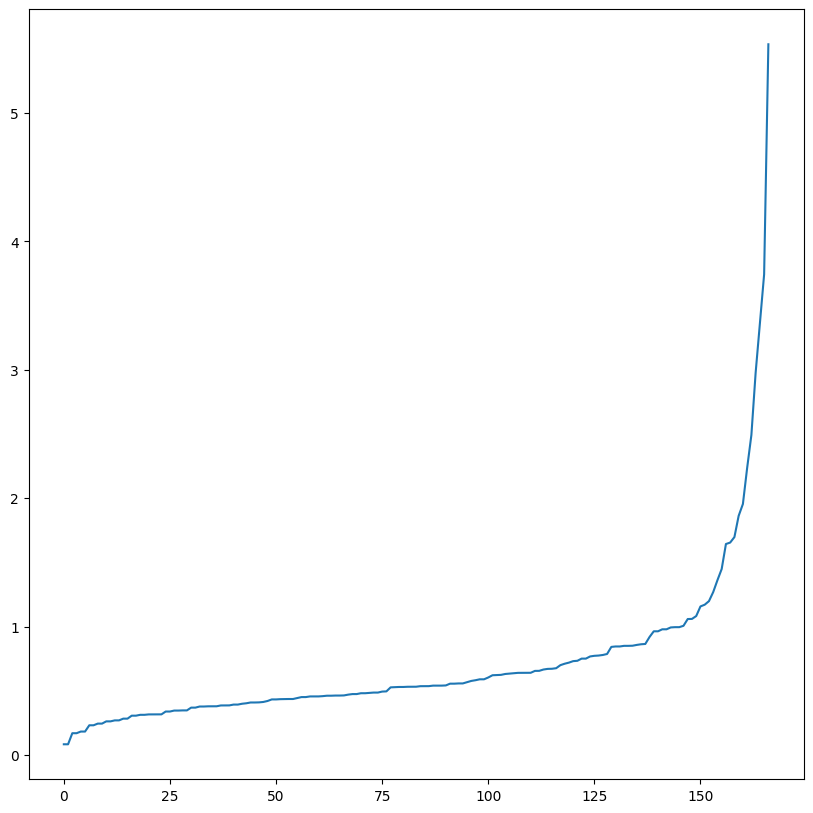

In [209]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [210]:
eps_values = np.arange(0.5,2,0.1)
min_samples = np.arange(3,12)


In [211]:
from itertools import product

In [212]:
dbscan_params = list(product(eps_values,min_samples))
num_of_cluster = []
sil_score = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
      
    except:
        sil_score.append(0)
    num_of_cluster.append(len(np.unique(y_dbscan)))

In [213]:
df_parame_tuning = pd.DataFrame.from_records(dbscan_params, columns=["Eps", "Min_samples"])
df_parame_tuning["sil_score"] = sil_score
df_parame_tuning["n_cluster"] = num_of_cluster


In [214]:
pivot_1 = pd.pivot_table(df_parame_tuning, values="sil_score", columns="Eps", index="Min_samples")
pivot_2 = pd.pivot_table(df_parame_tuning, values="n_cluster", columns="Eps", index="Min_samples")



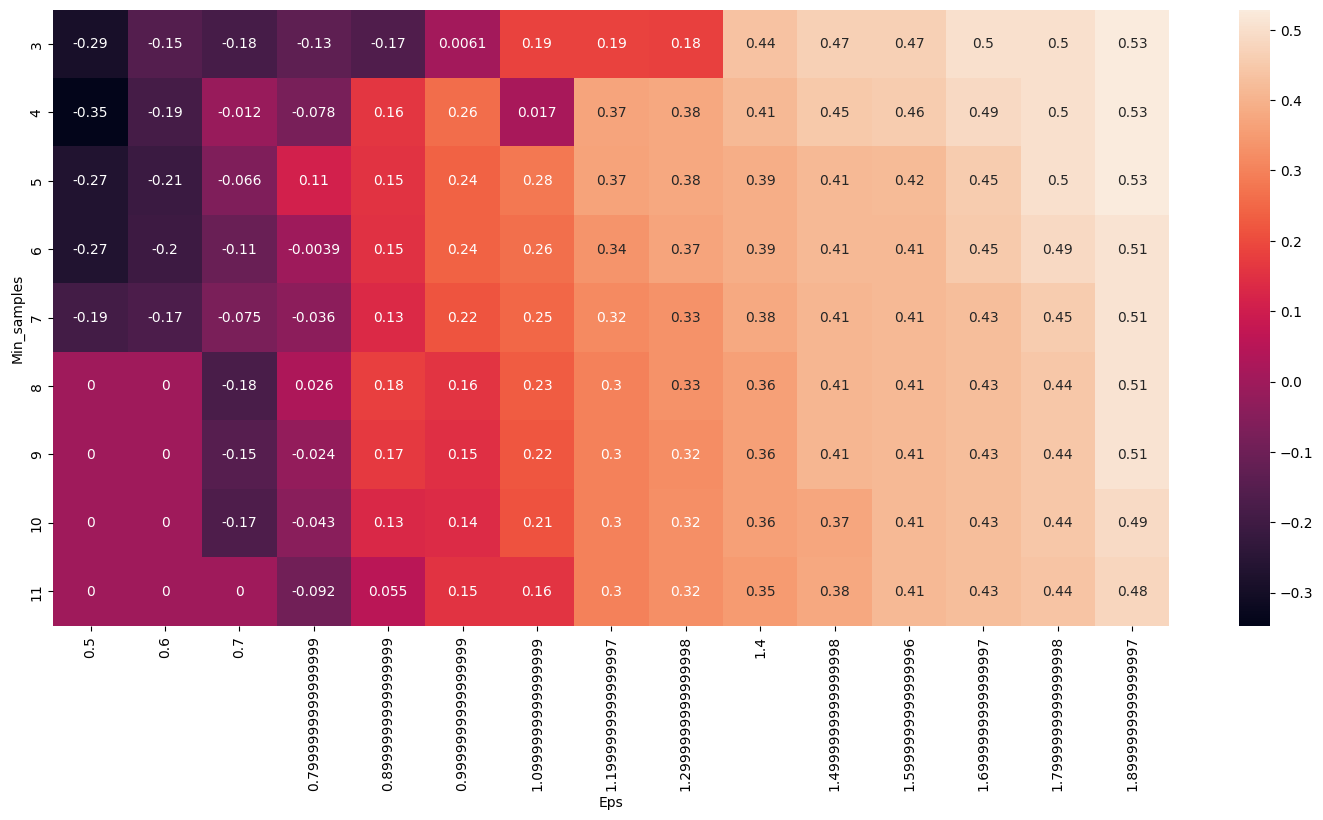

In [215]:
fig, ax = plt.subplots(figsize=(18,8))

sns.heatmap(pivot_1, annot=True, annot_kws={"size":10}, ax=ax)
plt.show()

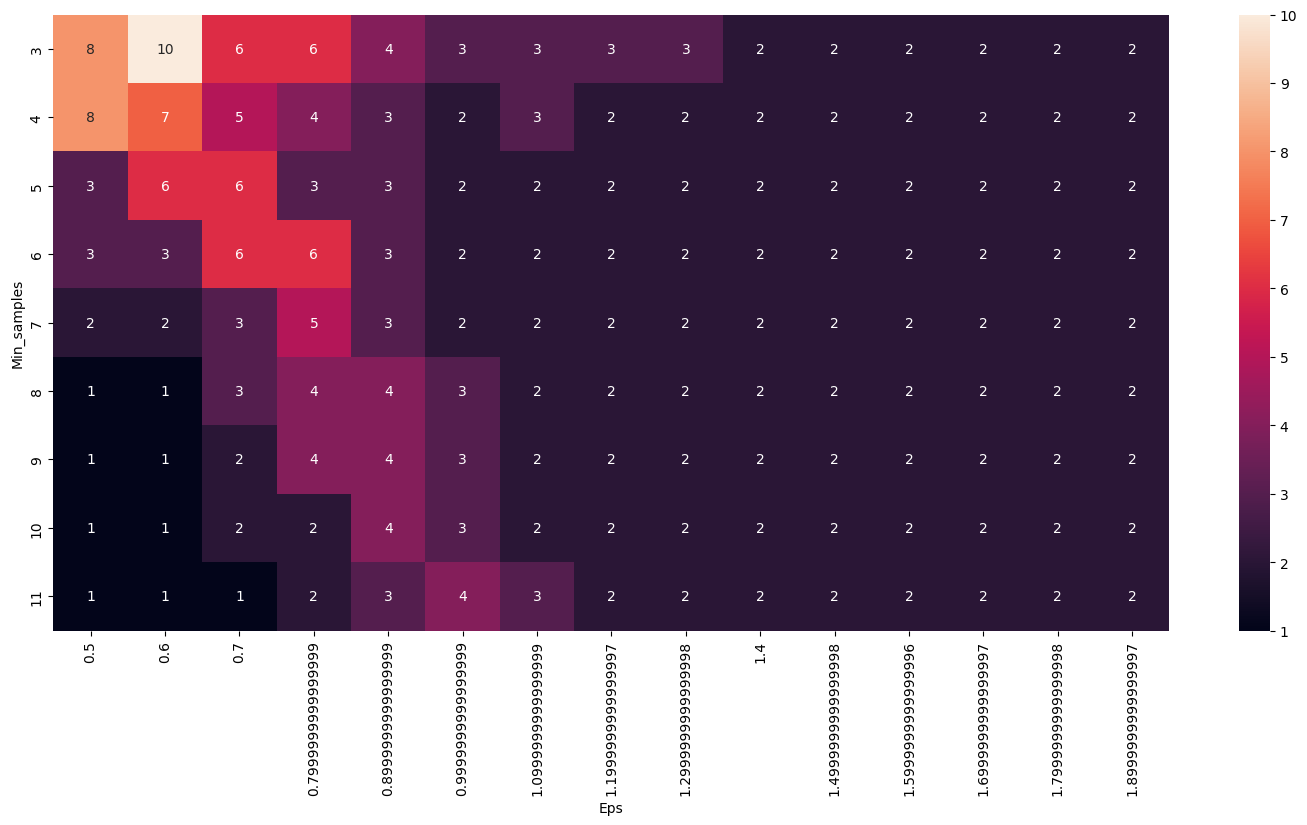

In [216]:
fig, ax = plt.subplots(figsize=(18,8))

sns.heatmap(pivot_2, annot=True, annot_kws={"size":10})
plt.show()

In [217]:
dbcan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbcan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan))
df_country["dbscan_pca"] = y_hc

0.18591175730784337


## Sin PCA

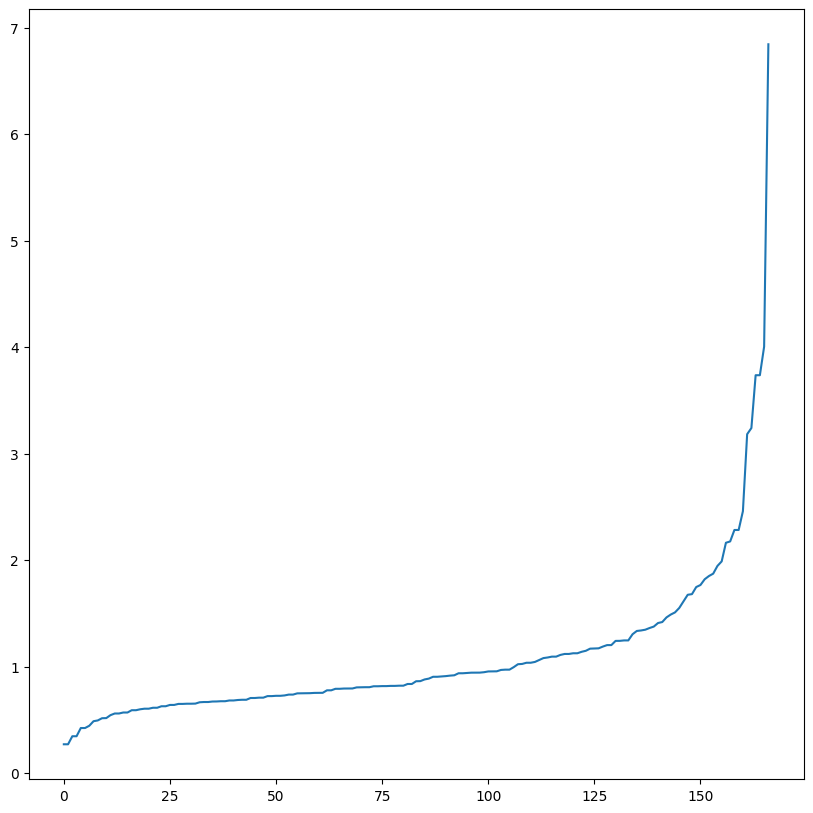

In [218]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scale)
distances, indices = neighbors_fit.kneighbors(df_country_scale) # sacar distancias y el indice

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [219]:
eps_values = np.arange(1,3.0,0.1)
min_samples = np.arange(3,12)

In [220]:
dbscan_params = list(product(eps_values,min_samples))
num_of_cluster = []
sil_score = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scale)
    try:
        sil_score.append(silhouette_score(df_country_scale,y_dbscan))
      
    except:
        sil_score.append(0)
    num_of_cluster.append(len(np.unique(y_dbscan)))

In [221]:
df_parame_tuning = pd.DataFrame.from_records(dbscan_params, columns=["Eps", "Min_samples"])
df_parame_tuning["sil_score"] = sil_score
df_parame_tuning["n_cluster"] = num_of_cluster

In [222]:
pivot_1 = pd.pivot_table(df_parame_tuning, values="sil_score", columns="Eps", index="Min_samples")
pivot_2 = pd.pivot_table(df_parame_tuning, values="n_cluster", columns="Eps", index="Min_samples")


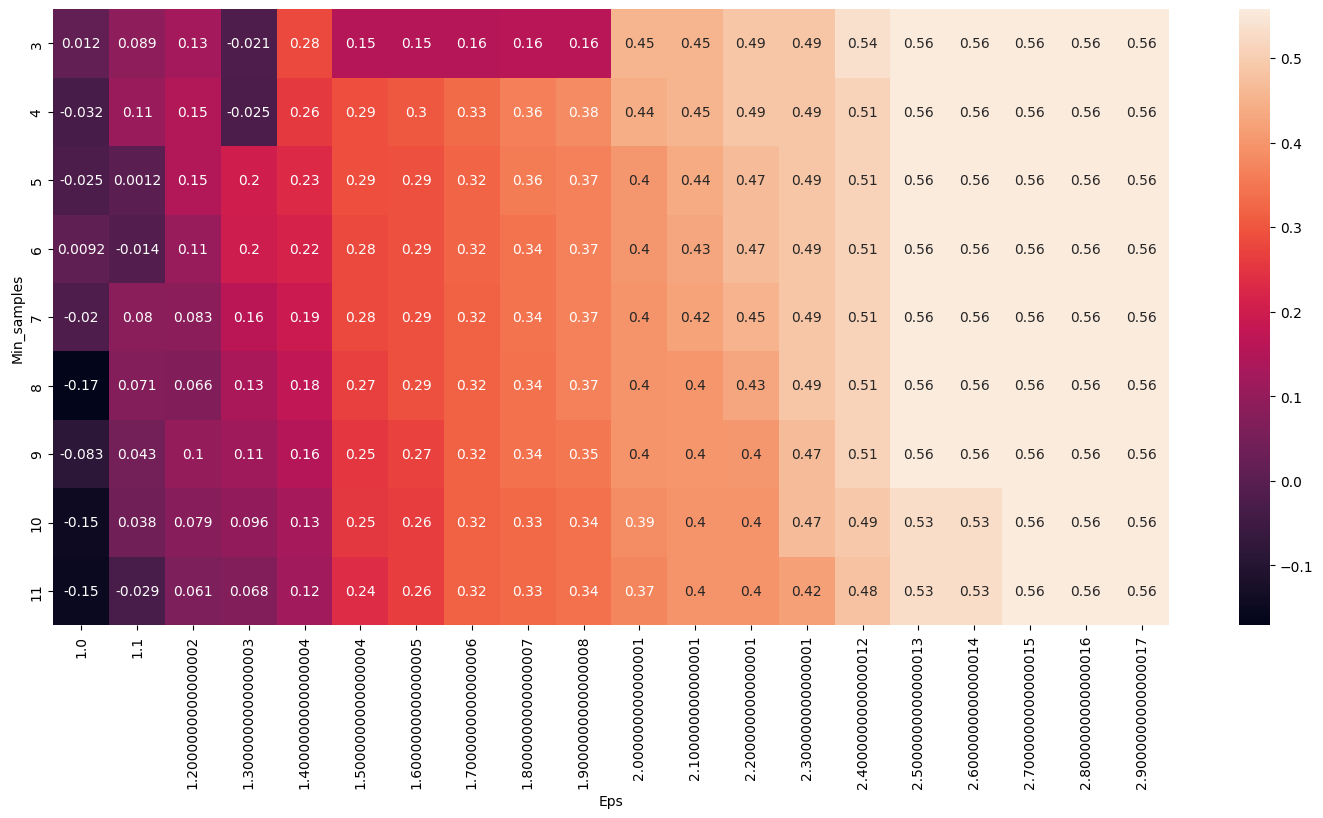

In [223]:
fig, ax = plt.subplots(figsize=(18,8))

sns.heatmap(pivot_1, annot=True, annot_kws={"size":10}, ax=ax)
plt.show()

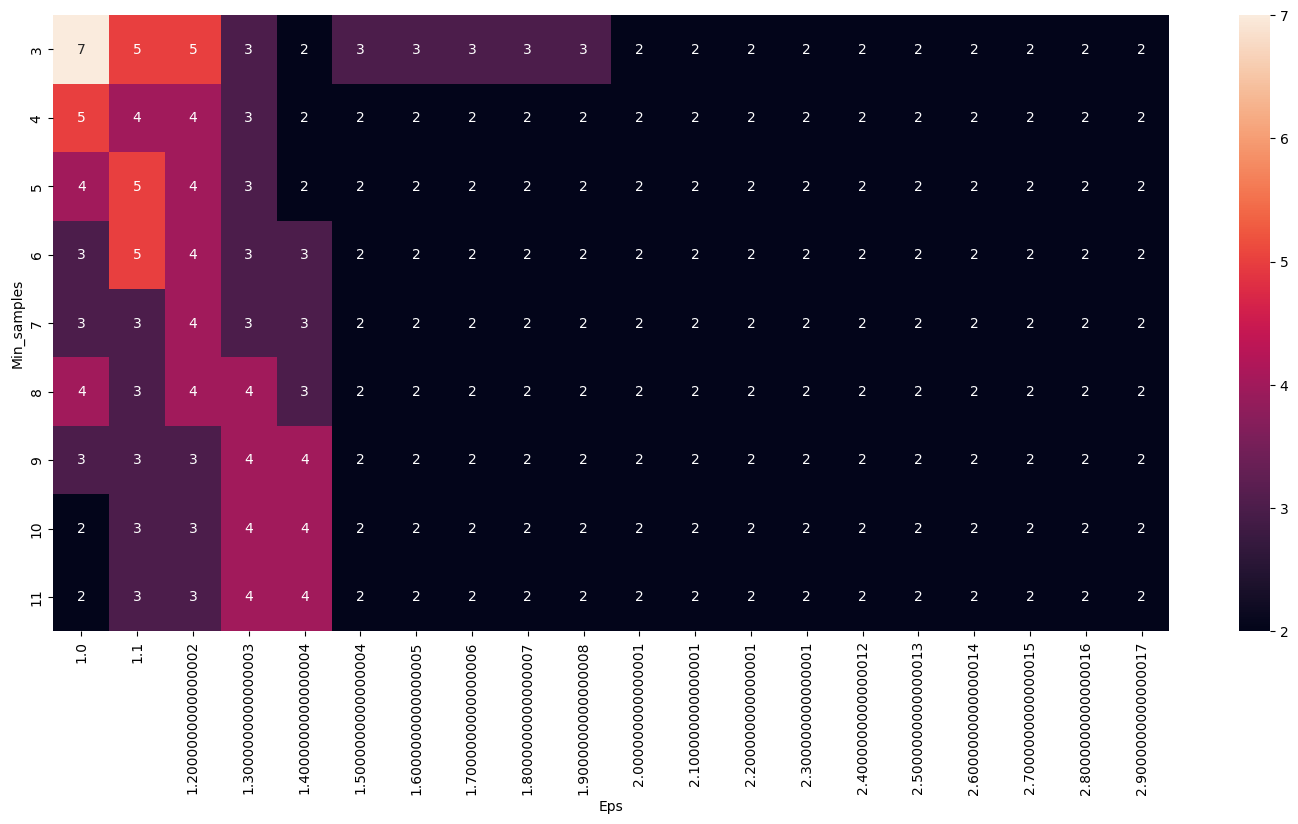

In [224]:
fig, ax = plt.subplots(figsize=(18,8))

sns.heatmap(pivot_2, annot=True, annot_kws={"size":10})
plt.show()

In [225]:
dbcan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbcan_train.fit_predict(df_country_scale)
print(silhouette_score(df_country_scale,y_dbscan))
df_country["dbscan_cluster"] = y_hc

0.1563549566374231


In [226]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,0,0,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,0,0


# Evaluación de resultados

In [227]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca', 'hc_pca',
       'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [ ]:
['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca', 'hc_pca',
       'dbscan_pca', 'dbscan_cluster'],

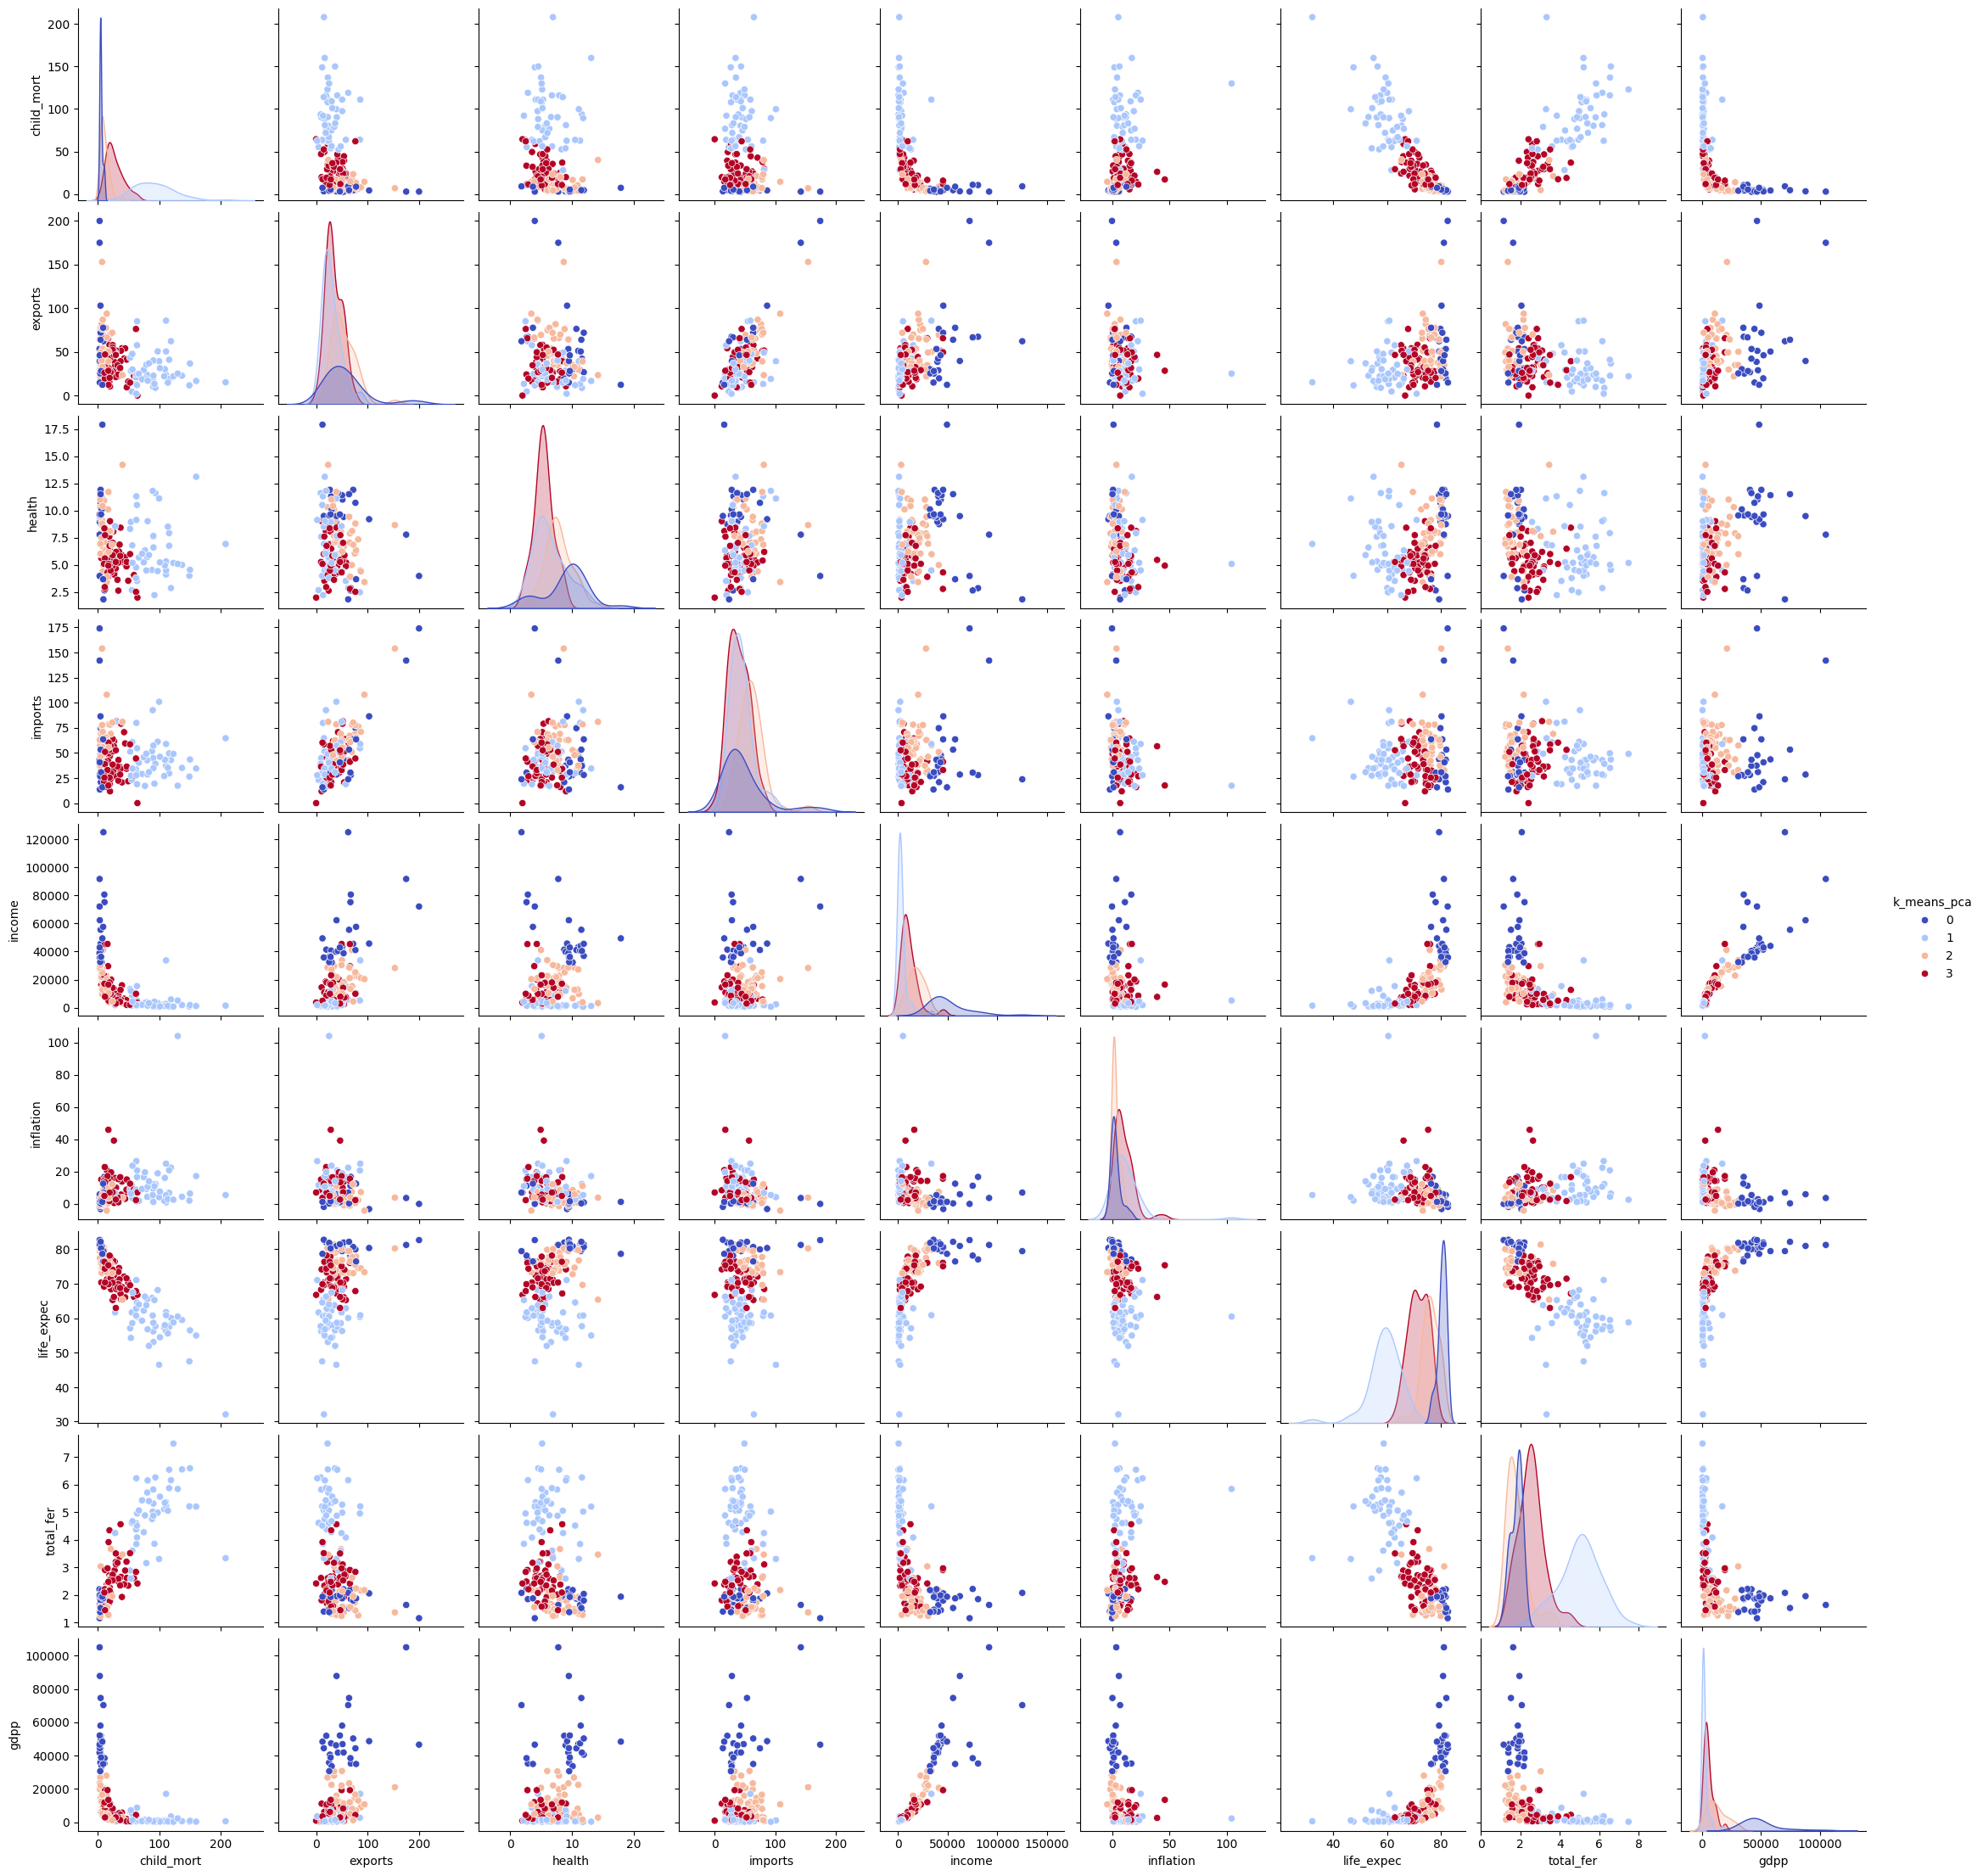

In [229]:
sns.pairplot(data = df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

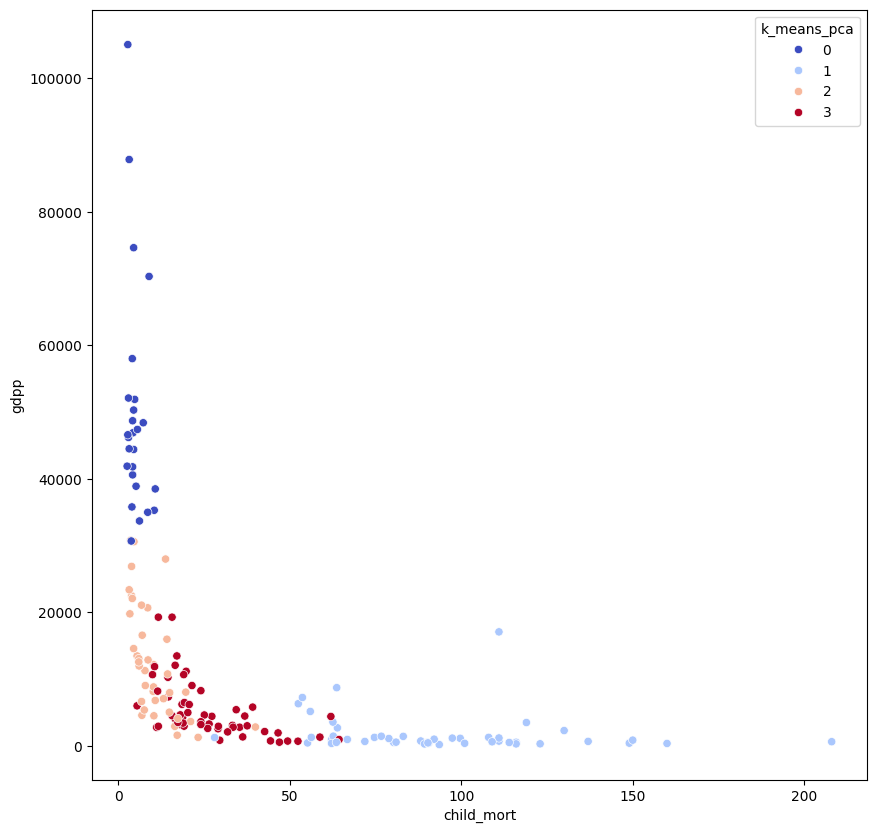

In [232]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country, x='child_mort', y='gdpp',hue='k_means_pca', palette='coolwarm')
plt.show()

In [233]:
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,hc_pca,dbscan_pca,dbscan_cluster
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090,3,0,0,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,3,0,0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,3,0,0,0
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220,3,0,0,0
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,3,0,0,0
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,3,0,0,0
14,Belarus,5.5,51.400,5.61,64.5000,16200,15.100,70.4,1.49,6030,3,0,0,0
16,Belize,18.8,58.200,5.20,57.5000,7880,1.140,71.4,2.71,4340,3,0,0,0
18,Bhutan,42.7,42.500,5.20,70.7000,6420,5.990,72.1,2.38,2180,3,0,0,0
19,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,3,0,0,0


In [237]:
import pycountry
import plotly.graph_objects as go
import plotly.express as px